# Class 08: Polynomial Regression & Regularization

---
## Generate Data

First, let's generate the curved data we'll use throughout this notebook.

In [5]:
import numpy as np
np.random.seed(42)

# Generate curved data: f(x) = sin(πx) + noise
X = np.linspace(0, 1, 30).reshape(-1, 1)
y = np.sin(np.pi * X).ravel() + np.random.normal(0, 0.1, 30)

print(f"Generated {len(X)} data points")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f'X_Data: {X}')
print(f'y_Data: {y}')

Generated 30 data points
X shape: (30, 1)
y shape: (30,)
X_Data: [[0.        ]
 [0.03448276]
 [0.06896552]
 [0.10344828]
 [0.13793103]
 [0.17241379]
 [0.20689655]
 [0.24137931]
 [0.27586207]
 [0.31034483]
 [0.34482759]
 [0.37931034]
 [0.4137931 ]
 [0.44827586]
 [0.48275862]
 [0.51724138]
 [0.55172414]
 [0.5862069 ]
 [0.62068966]
 [0.65517241]
 [0.68965517]
 [0.72413793]
 [0.75862069]
 [0.79310345]
 [0.82758621]
 [0.86206897]
 [0.89655172]
 [0.93103448]
 [0.96551724]
 [1.        ]]
y_Data: [ 0.04967142  0.09429259  0.27973929  0.47160452  0.39647376  0.49214016
  0.7630955   0.76444293  0.71521462  0.881945    0.83717028  0.88240374
  0.98774622  0.7954985   0.82604163  0.94230466  0.88554341  0.99497473
  0.83817431  0.74228167  0.97425388  0.73958443  0.69445228  0.4626994
  0.46111558  0.43098136  0.20420217  0.25254024  0.04805515 -0.02916937]


---
## Linear Regression Fails on Curved Data

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model_linear = LinearRegression()
model_linear.fit(X, y)
y_pred_linear = model_linear.predict(X)

print(f"R² = {r2_score(y, y_pred_linear):.3f}")

R² = 0.010


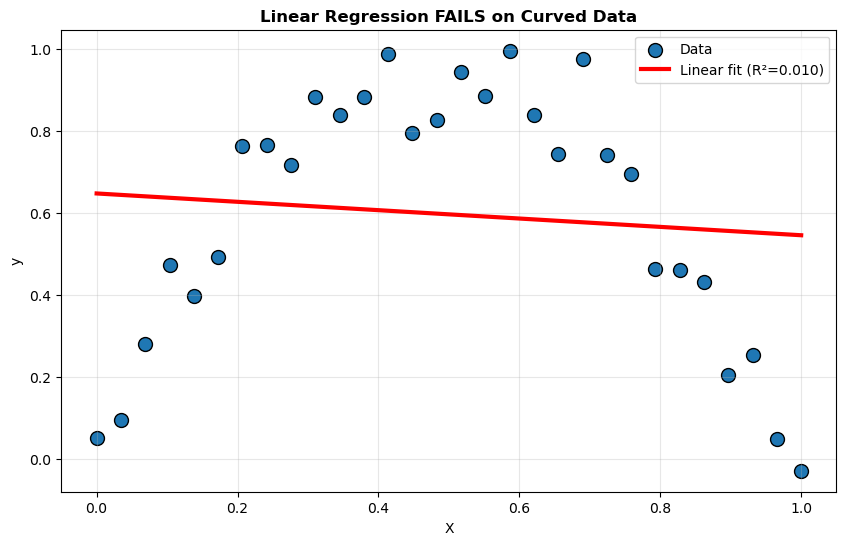

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X, y, s=100, edgecolors='black', label='Data')
plt.plot(X, y_pred_linear, 'r-', linewidth=3, label=f'Linear fit (R²={r2_score(y, y_pred_linear):.3f})')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression FAILS on Curved Data', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

---
## Polynomial Regression

**Idea:** Transform X → [X, X², X³] then apply linear regression

Model: y = w₀ + w₁·X + w₂·X² + w₃·X³

In [6]:
from sklearn.preprocessing import PolynomialFeatures

poly_example = PolynomialFeatures(degree=3)
sample = np.array([[2]])
transformed = poly_example.fit_transform(sample) # Create polynomial features

print("Input: X = 2")
print(f"Output: {transformed[0]}")
print(f"Which is: [1, X, X², X³] = [1, 2, 4, 8]")

Input: X = 2
Output: [1. 2. 4. 8.]
Which is: [1, X, X², X³] = [1, 2, 4, 8]


### Feature Explosion with Multiple Features

In [7]:
# Example: 3 features with degree 2
sample_multi = np.array([[1, 2, 3]])
poly_multi = PolynomialFeatures(degree=2)
transformed_multi = poly_multi.fit_transform(sample_multi)

print(f"Original: 3 features")
print(f"After degree 2: {transformed_multi.shape[1]} features")
print(f"\nFeatures: {poly_multi.get_feature_names_out()}")

Original: 3 features
After degree 2: 10 features

Features: ['1' 'x0' 'x1' 'x2' 'x0^2' 'x0 x1' 'x0 x2' 'x1^2' 'x1 x2' 'x2^2']


In [8]:
from scipy.special import comb

print("Feature Growth:")
print("Original | Degree | Total")
print("-" * 28)
for p in [3, 5, 10]:
    for d in [2, 3]:
        total = int(comb(p + d, d))
        print(f"   {p:2d}    |   {d}    |  {total:3d}")

Feature Growth:
Original | Degree | Total
----------------------------
    3    |   2    |   10
    3    |   3    |   20
    5    |   2    |   21
    5    |   3    |   56
   10    |   2    |   66
   10    |   3    |  286


### Try Different Degrees

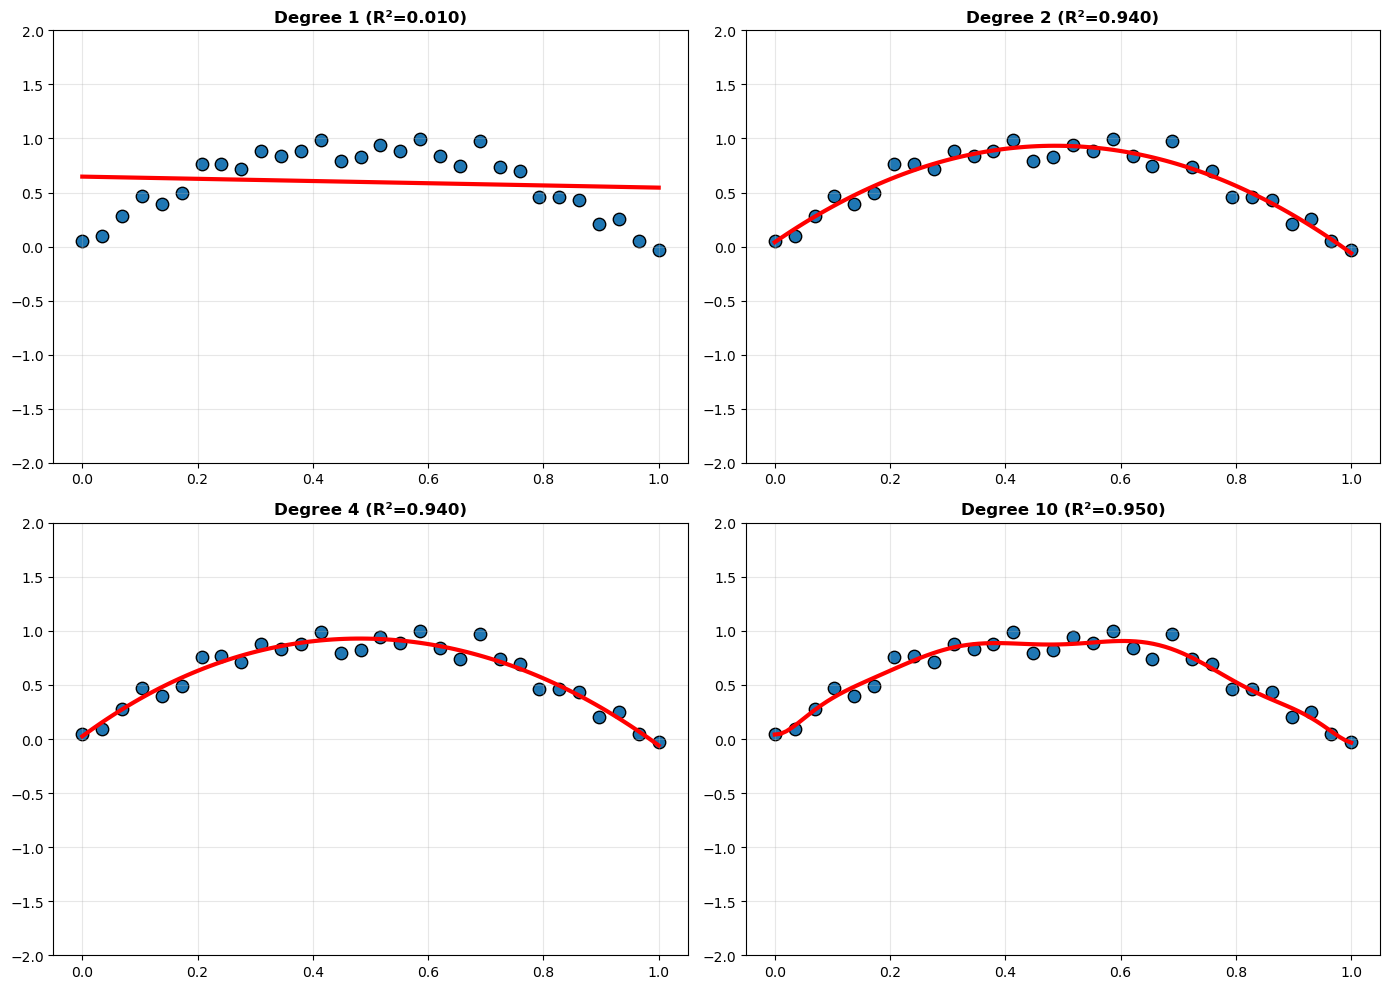

In [9]:
# Compare degrees: 1, 2, 4, 10
degrees = [1, 2, 4, 10]
X_plot = np.linspace(0, 1, 100).reshape(-1, 1)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for i, degree in enumerate(degrees):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    X_plot_poly = poly.transform(X_plot)

    model = LinearRegression()
    model.fit(X_poly, y)
    y_plot = model.predict(X_plot_poly)

    r2 = r2_score(y, model.predict(X_poly))

    axes[i].scatter(X, y, s=80, edgecolors='black')
    axes[i].plot(X_plot, y_plot, 'r-', linewidth=3)
    axes[i].set_ylim(-2, 2)
    axes[i].set_title(f'Degree {degree} (R²={r2:.3f})', fontweight='bold')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

---
## Overfitting Problem

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Train: {len(X_train)} samples")
print(f"Test: {len(X_test)} samples")

Train: 21 samples
Test: 9 samples


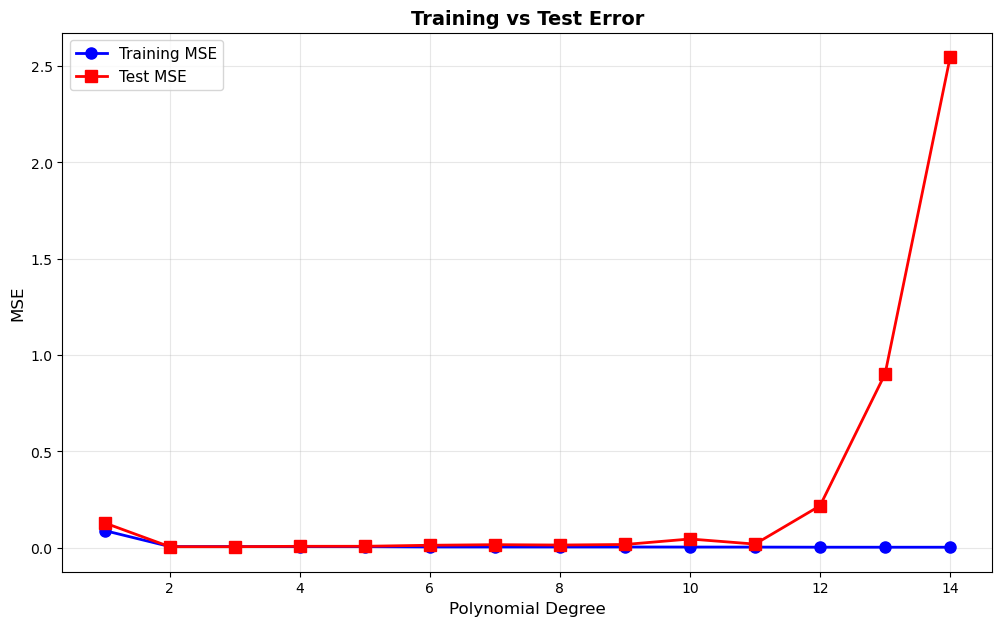

Training MSE: keeps decreasing
Test MSE: goes down then UP (overfitting starts)


In [11]:
# Test degrees 1 to 14
degrees_test = range(1, 15)
train_errors = []
test_errors = []

for degree in degrees_test:
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    train_errors.append(mean_squared_error(y_train, model.predict(X_train_poly)))
    test_errors.append(mean_squared_error(y_test, model.predict(X_test_poly)))

# Plot
plt.figure(figsize=(12, 7))
plt.plot(degrees_test, train_errors, 'bo-', linewidth=2, markersize=8, label='Training MSE')
plt.plot(degrees_test, test_errors, 'rs-', linewidth=2, markersize=8, label='Test MSE')
plt.xlabel('Polynomial Degree', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.title('Training vs Test Error', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.show()

print("Training MSE: keeps decreasing")
print("Test MSE: goes down then UP (overfitting starts)")

### Coefficient Explosion

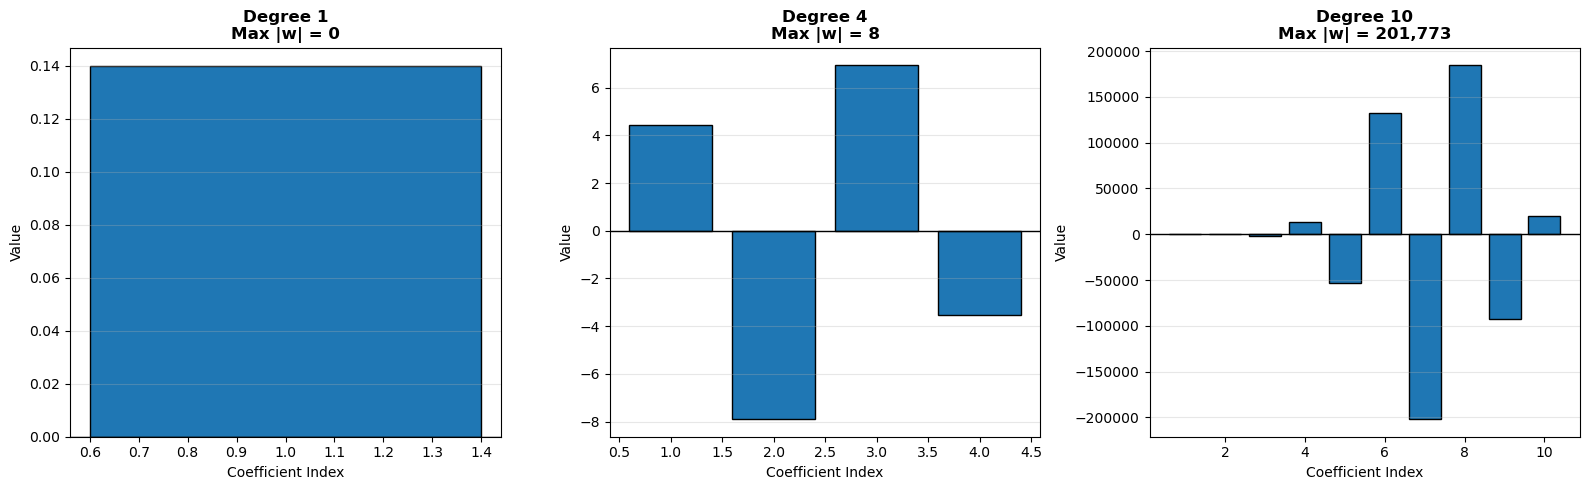

Degree 10: Coefficients EXPLODE to thousands/millions!
Large coefficients → Sharp wiggles → Overfitting


In [12]:
# Show coefficient growth
degrees_coef = [1, 4, 10]
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

for i, degree in enumerate(degrees_coef):
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    coeffs = model.coef_[1:]  # Skip intercept
    axes[i].bar(range(1, len(coeffs)+1), coeffs, edgecolor='black')
    axes[i].set_title(f'Degree {degree}\nMax |w| = {np.max(np.abs(coeffs)):,.0f}', fontweight='bold')
    axes[i].set_xlabel('Coefficient Index')
    axes[i].set_ylabel('Value')
    axes[i].grid(True, alpha=0.3, axis='y')
    axes[i].axhline(0, color='black', linewidth=1)

plt.tight_layout()
plt.show()

print("Degree 10: Coefficients EXPLODE to thousands/millions!")
print("Large coefficients → Sharp wiggles → Overfitting")

---
## Regularization

**Ridge (L2):** Loss = Bsae_Loss + α × Σwᵢ²  
**Lasso (L1):** Loss = Bsae_Loss + α × Σ|wᵢ|

In [13]:
from sklearn.linear_model import Ridge

degree = 10
alpha = 0.01

poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# No regularization
model_no_reg = LinearRegression()
model_no_reg.fit(X_train_poly, y_train)

# Ridge
model_ridge = Ridge(alpha=alpha)
model_ridge.fit(X_train_poly, y_train)

# Evaluate
test_r2_no_reg = r2_score(y_test, model_no_reg.predict(X_test_poly))
test_r2_ridge = r2_score(y_test, model_ridge.predict(X_test_poly))

print(f"Degree {degree}:")
print(f"Without regularization: R² = {test_r2_no_reg:.3f}")
print(f"With Ridge (α={alpha}):  R² = {test_r2_ridge:.3f}")

Degree 10:
Without regularization: R² = 0.577
With Ridge (α=0.01):  R² = 0.922


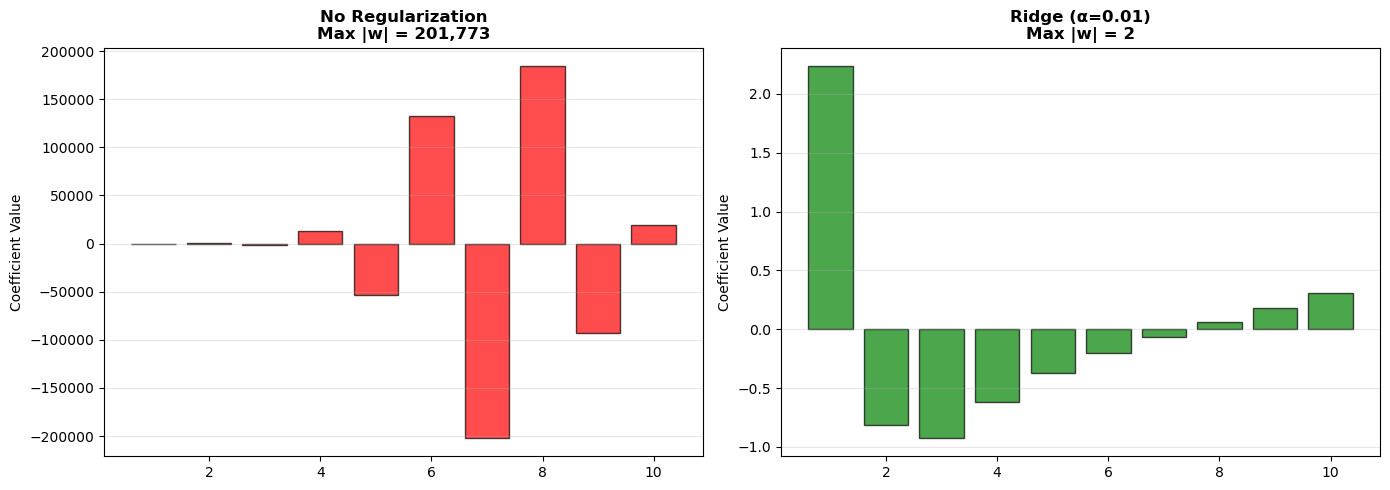

Ridge keeps coefficients SMALL → Better generalization


In [14]:
# Compare coefficients
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

coeffs_no_reg = model_no_reg.coef_[1:]
coeffs_ridge = model_ridge.coef_[1:]

ax1.bar(range(1, len(coeffs_no_reg)+1), coeffs_no_reg, edgecolor='black', color='red', alpha=0.7)
ax1.set_title(f'No Regularization\nMax |w| = {np.max(np.abs(coeffs_no_reg)):,.0f}', fontweight='bold')
ax1.set_ylabel('Coefficient Value')
ax1.grid(True, alpha=0.3, axis='y')

ax2.bar(range(1, len(coeffs_ridge)+1), coeffs_ridge, edgecolor='black', color='green', alpha=0.7)
ax2.set_title(f'Ridge (α={alpha})\nMax |w| = {np.max(np.abs(coeffs_ridge)):,.0f}', fontweight='bold')
ax2.set_ylabel('Coefficient Value')
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("Ridge keeps coefficients SMALL → Better generalization")

### Ridge vs Lasso

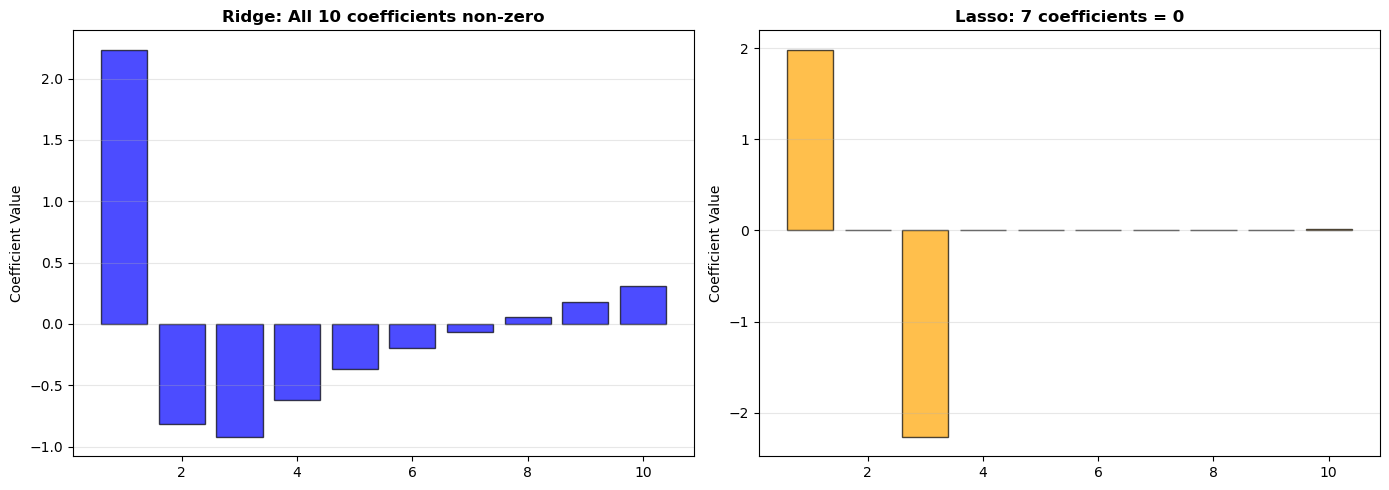

Ridge: Shrinks all coefficients
Lasso: Sets 7 coefficients to EXACTLY zero (feature selection)


In [15]:
# Lasso regularization
from sklearn.linear_model import Lasso

model_lasso = Lasso(alpha=0.001, max_iter=10000)
model_lasso.fit(X_train_poly, y_train)

coeffs_lasso = model_lasso.coef_[1:]
zero_count = np.sum(np.abs(coeffs_lasso) < 0.0001)

# Compare
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.bar(range(1, len(coeffs_ridge)+1), coeffs_ridge, edgecolor='black', color='blue', alpha=0.7)
ax1.set_title(f'Ridge: All {len(coeffs_ridge)} coefficients non-zero', fontweight='bold')
ax1.set_ylabel('Coefficient Value')
ax1.grid(True, alpha=0.3, axis='y')

ax2.bar(range(1, len(coeffs_lasso)+1), coeffs_lasso, edgecolor='black', color='orange', alpha=0.7)
ax2.set_title(f'Lasso: {zero_count} coefficients = 0', fontweight='bold')
ax2.set_ylabel('Coefficient Value')
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print(f"Ridge: Shrinks all coefficients")
print(f"Lasso: Sets {zero_count} coefficients to EXACTLY zero (feature selection)")

### Alpha Tuning

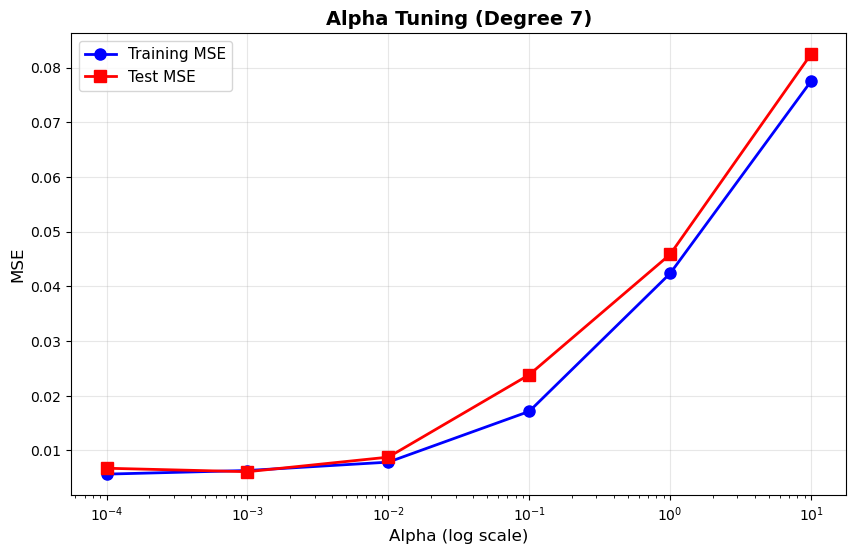

Best alpha: 0.001


In [16]:
# Find best alpha
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10]
degree = 7

poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

train_mses = []
test_mses = []

for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(X_train_poly, y_train)

    train_mses.append(mean_squared_error(y_train, model.predict(X_train_poly)))
    test_mses.append(mean_squared_error(y_test, model.predict(X_test_poly)))

best_alpha = alphas[np.argmin(test_mses)]

plt.figure(figsize=(10, 6))
plt.plot(alphas, train_mses, 'bo-', linewidth=2, markersize=8, label='Training MSE')
plt.plot(alphas, test_mses, 'rs-', linewidth=2, markersize=8, label='Test MSE')
plt.xscale('log')
plt.xlabel('Alpha (log scale)', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.title(f'Alpha Tuning (Degree {degree})', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.show()

print(f"Best alpha: {best_alpha}")

---
## GridSearchCV

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Create pipeline
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('model', Ridge())
])

# Define search space
param_grid = {
    'poly__degree': [1, 2, 3],
    'model__alpha': [0.1, 1, 10, 100]
}

# Grid search
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

print(f"Best degree: {grid.best_params_['poly__degree']}")
print(f"Best alpha:  {grid.best_params_['model__alpha']}")
print(f"\nTest R²: {r2_score(y_test, grid.predict(X_test)):.4f}")

Best degree: 3
Best alpha:  0.1

Test R²: 0.7770
